# T2.1

Gabriela Bevilacqua - 1511241
<br>
Joyce Araújo - 1213110
<br>
<br>
Exploração, análise de dados e clusterização sobre o dataset "Individual household electric power consumption" da UCI.

## Eletric Power Consuption DataSet  Information

DataSet from University of California Irvine (UCI)
<br>
Available at https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption
<br><br>
**Attribute Information:**
<br>
1.date: Date in format dd/mm/yyyy
<br>
2.time: time in format hh:mm:ss 
<br>
3.global_active_power: household global minute-averaged active power (in kilowatt) 
<br>
4.global_reactive_power: household global minute-averaged reactive power (in kilowatt) 
<br>
5.voltage: minute-averaged voltage (in volt) 
<br>
6.global_intensity: household global minute-averaged current intensity (in ampere) 
<br>
7.sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a 
dishwasher, an oven and a microwave (hot plates are not electric but gas powered). 
<br>
8.sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a 
washing-machine, a tumble-drier, a refrigerator and a light. 
<br>
9.sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


## Exploração e Análise de Dados

### Opening Dataset

In [2]:
import numpy as np
import pandas as pd
from scipy import cluster
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import matplotlib.dates as dates

#### DataFrame

In [4]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [5]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


#### Column Types and Description

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [7]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


#### Number of Instances

In [8]:
df.shape

(2075259, 7)

#### Adapting Data

In [9]:
# Preenchendo as células que contém nan (not a number) com a média dos valores
columns_fill = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for column in columns_fill:
    df[column].fillna((df[column].mean()), inplace=True)

#### Adding Sub Metering 4 ( Other Eletrical Equipments )

In [10]:
df['Sub_metering_4'] = (df['Global_active_power']*1000/60 - df['Sub_metering_1'] - df['Sub_metering_2'] - df['Sub_metering_3'])

#### Analisys
O dataset é muito grande e por isso algumas manipulações talvez demorem para executar.
<br>
Como descrito nas informações do dataset, cerca de 1.25% das instâncias contém valores faltando. Por isso foi necessário adaptar os dados das colunas substituindo células com NaN pela média dos valores daquela coluna.

### Data Visualization

#### Current Intensity through month


In [98]:
# Convenience method for frequency conversion and resampling of time series.
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html

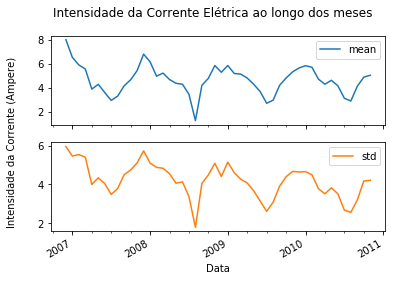

In [25]:
r = df.Global_intensity.resample('M').agg(['mean', 'std'])
r.plot(subplots = True, title='Intensidade da Corrente Elétrica ao longo dos meses')
plt.xlabel('Data')
plt.ylabel('Intensidade da Corrente (Ampere)')
ax = plt.gca() 
ax.yaxis.set_label_coords(-0.1, 1.0) 
plt.show()

#### Total Energy Consume through day

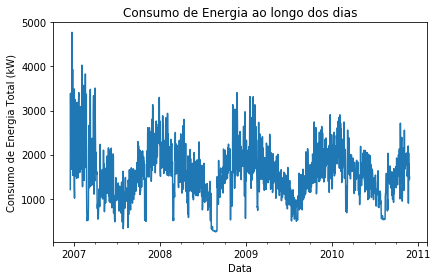

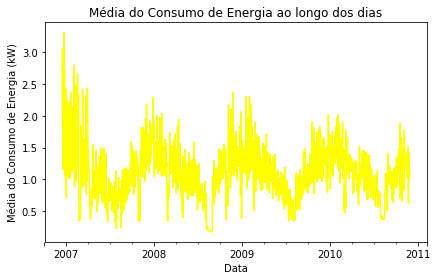

In [100]:
df.Global_active_power.resample('D').sum().plot(title='Consumo de Energia ao longo dos dias') 
plt.tight_layout()
plt.xlabel('Data')
plt.ylabel('Consumo de Energia Total (kW)')
plt.show()   

df.Global_active_power.resample('D').mean().plot(title='Média do Consumo de Energia ao longo dos dias', color='yellow') 
plt.tight_layout()
plt.xlabel('Data')
plt.ylabel('Média do Consumo de Energia (kW)')
plt.show()

#### Reactive Energy through day

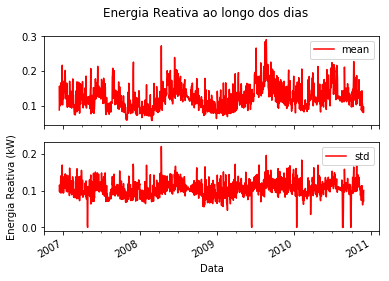

In [34]:
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Energia Reativa ao longo dos dias', color='red')
plt.xlabel('Data')
plt.ylabel('Energia Reativa (kW)')
plt.show()

#### Energy Consume for specific date (01/02/2017)

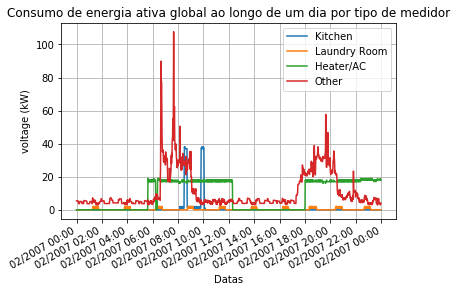

In [99]:
fig, ax = plt.subplots()
ax.plot(df.loc['2007-02-01'].index, df.loc['2007-02-01']['Sub_metering_1'], label='Kitchen')
ax.plot(df.loc['2007-02-01'].index, df.loc['2007-02-01']['Sub_metering_2'], label='Laundry Room')
ax.plot(df.loc['2007-02-01'].index, df.loc['2007-02-01']['Sub_metering_3'], label='Heater/AC')
ax.plot(df.loc['2007-02-01'].index, df.loc['2007-02-01']['Sub_metering_4'], label='Other')

ax.set(xlabel='Datas', ylabel='voltage (kW)',
       title='Consumo de energia ativa global ao longo de um dia por tipo de medidor')
ax.grid()
ax.set_xticks(df.loc['2007-02-01'].index)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%m/%Y %H:%M'))
plt.gca().xaxis.set_major_locator(dates.HourLocator(byhour=range(0,24,2)))
plt.gcf().autofmt_xdate()
plt.legend(loc='upper right')
plt.show()

#### Heater/AC Consume by month

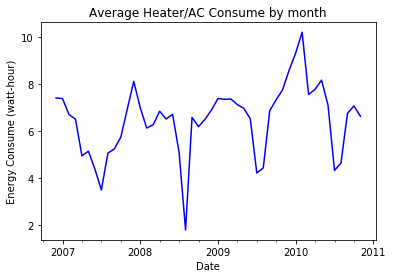

In [90]:
fig, ax = plt.subplots()
df.Sub_metering_3.resample('M').mean().plot(title='Average Heater/AC Consume by month', color='blue') 
plt.xlabel('Date')
plt.ylabel('Energy Consume (watt-hour)')
plt.show()

#### Data Exploration Conclusions
O consumo de energia em uma residência não possui um padrão muito estável.
<br><br>
Através de pesquisas descobrimos que a energia ativa (Global Active Power) é o que mede o consumo de energia na residência e a energia reativa (Global Reative Power) é uma parte da energia fornecida para a residência que é "acumulada" durante o ciclo de onda da corrente alternada. Podemos dizer então que não é um dado muito útil para ser utilizado nos modelos, pois é uma energia não utilizada na prática pela residência.
<br><br>
Também foi possível avaliar que o ar acondicionado ou aquecedor possui os valores de consumo mais altos nos períodos de início e fim de ano. Provavelmente, o consumo de ar condicionado durante o verão não gasta tanta energia quanto o consumo do aquecedor no inverno.
<br><br>
A intensidade da corrente e o consumo de energia (geral) também se comportam um pouco dessa forma, tendo uma média mais alta nos dias do início do ano e diminuindo gradualmente até o final do ano.

### Clustering Data

#### Find Best Number of Clusters

In [59]:
# pegando apenas os dados de sub metering 

# aux = df.resample('M').mean()
# aux = pd.DataFrame(aux)
X = df.iloc[:, 4:7].values
# aux.head()

array([[18.4,  0. ,  1. , 17. ],
       [23. ,  0. ,  1. , 16. ],
       [23. ,  0. ,  2. , 17. ],
       ...,
       [18.2,  0. , 36. ,  0. ],
       [20.2,  0. , 37. ,  0. ],
       [19.8,  0. , 36. ,  0. ]])

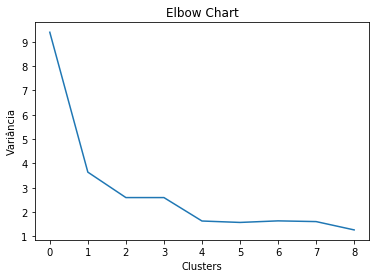

In [60]:
# using Elbow Method

initial = [cluster.vq.kmeans(X,i) for i in range(1,10)]
plt.plot([var for (cent,var) in initial])
plt.xlabel('Clusters')
plt.ylabel('Variância')
plt.title('Elbow Chart')
plt.show()

#### Elbow Chart Analisation
A velocidade de decrescimento diminui a partir do quarto cluster o que nos indica k = 4

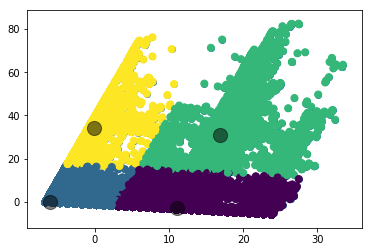

In [61]:
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1])
kmeans = KMeans(n_clusters=4, random_state=111)
kmeans.fit(pca_2d)
y_kmeans = kmeans.predict(pca_2d)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.8242607509865003


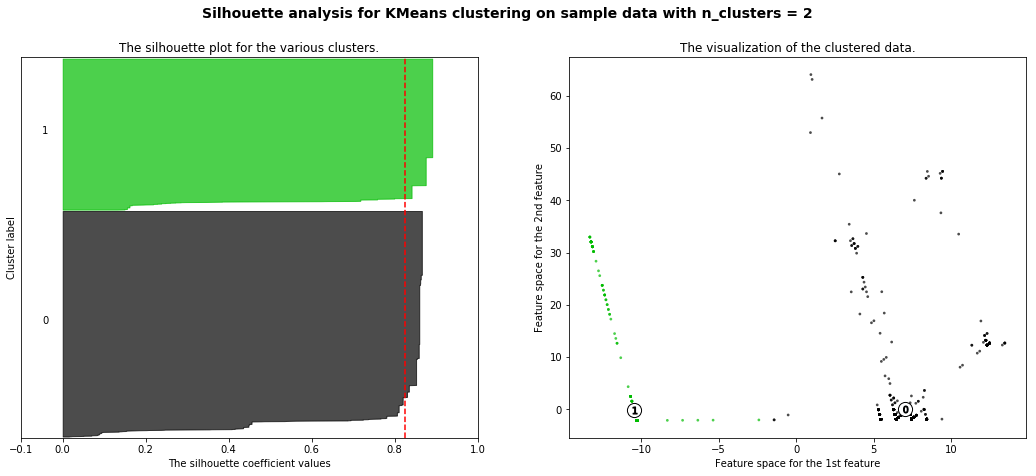

For n_clusters = 3 The average silhouette_score is : 0.8954230469963106


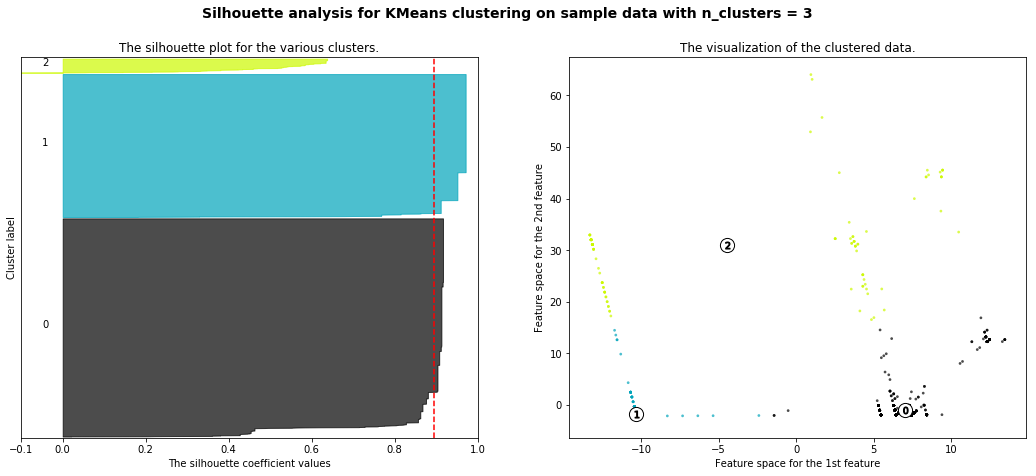

For n_clusters = 4 The average silhouette_score is : 0.9137955368330754


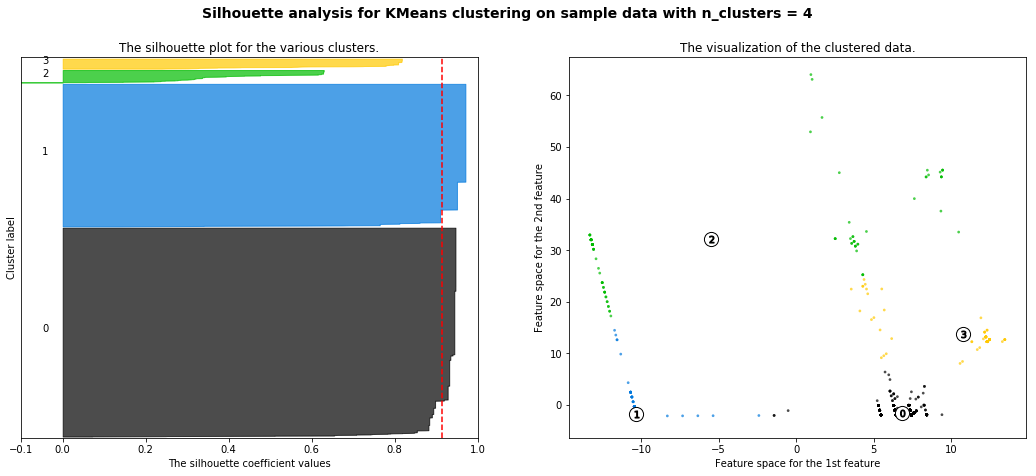

For n_clusters = 5 The average silhouette_score is : 0.921712151328445


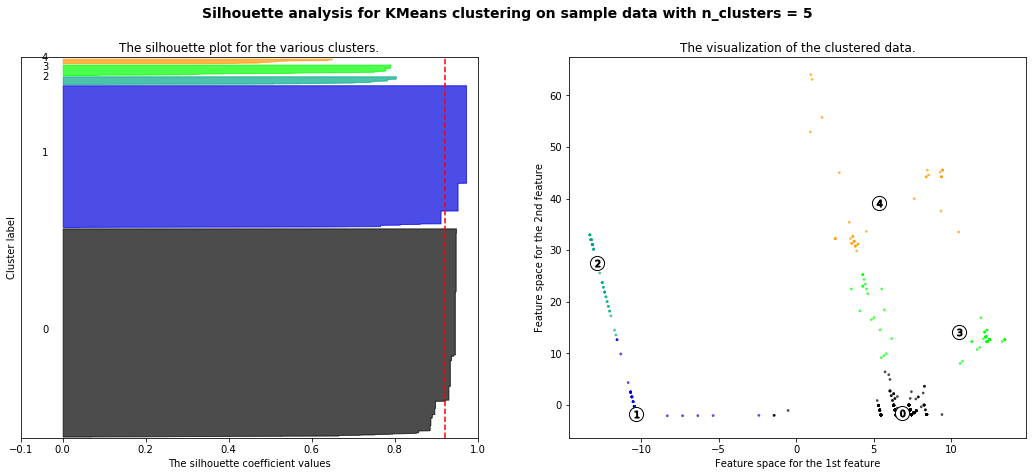

For n_clusters = 6 The average silhouette_score is : 0.921681304922426


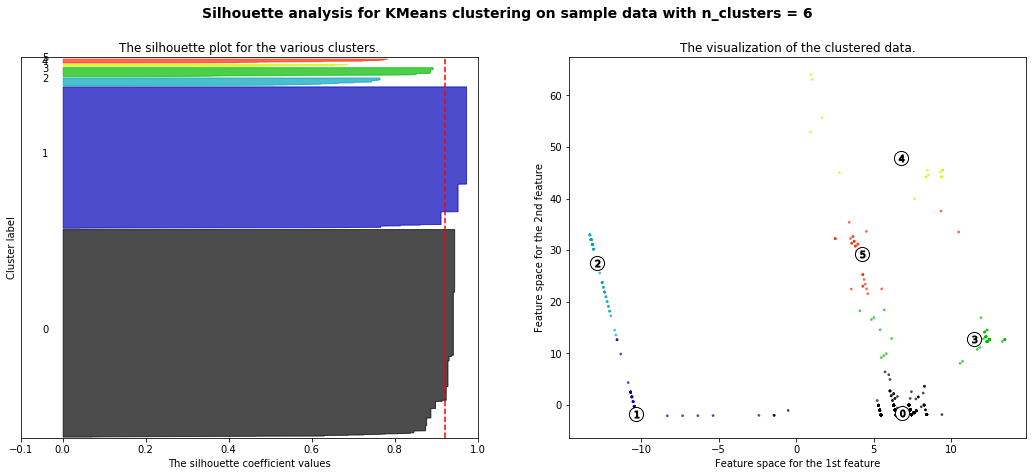

In [58]:
# silhouette

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_2d) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_2d)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_2d, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_2d, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # DEPRECATED: plt.cm.spectral to plt.cm.nipy_spectral
#         new_cm = plt.cm.spectral
        new_cm = plt.cm.nipy_spectral
        color = new_cm(float(i) / n_clusters)
    
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = new_cm(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_2d[:, 0], pca_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

#### Clustering Conclusions
A partir do método de KMeans utilizado para a clusterização dos dados, parece que seria suficiente separar o consumo de energia dos cômodos da casa em 4 grupos com consumo de energia semelhante. Nós usamos o Elbow method para nos auxiliar a encontrar a quantidade de clusters ideal, já que o dataset é muito grande e leva muito tempo para ser processado pelo método silhouette.